# Distributed Brute Force Attacks Detection using Network Flow Data with Decision Tree Modela

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df12 = pd.read_csv("12-NsisAy-20110819.binetflow.csv")     # Distributed Brute Force Attacks on Remote Servers like FTP or SSH

In [ ]:
df12.shape

(325471, 15)

In [ ]:
df12.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/19 10:32:31.926442,3.003373,tcp,147.32.86.194,4207,->,77.75.73.9,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
1,2011/08/19 10:37:05.849782,0.967492,tcp,147.32.3.51,1056,->,147.32.87.22,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
2,2011/08/19 10:38:48.257124,0.000000,tcp,60.2.174.102,80,?>,147.32.85.48,21885,RA_,0.0,NaN,1,60,60,flow=Background
3,2011/08/19 10:41:12.342795,1.391385,tcp,200.99.228.67,3259,->,147.32.87.62,10401,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/19 10:44:52.276736,1.124664,tcp,147.32.3.51,1089,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


### Data Preprocessing

In [ ]:
df12 = df12.drop('Dir', axis =1)

In [ ]:
df12.dropna(inplace=True)

In [ ]:
nRow, nCol = df12.shape
print(f'This Dataset has {nRow} rows and {nCol} columns')

This Dataset has 295270 rows and 14 columns


In [ ]:
for i, col in enumerate(df12.columns):
    print(i, col)

0 StartTime
1 Dur
2 Proto
3 SrcAddr
4 Sport
5 DstAddr
6 Dport
7 State
8 sTos
9 dTos
10 TotPkts
11 TotBytes
12 SrcBytes
13 Label


In [ ]:
df12.dtypes

StartTime     object
Dur          float64
Proto         object
SrcAddr       object
Sport         object
DstAddr       object
Dport         object
State         object
sTos         float64
dTos         float64
TotPkts        int64
TotBytes       int64
SrcBytes       int64
Label         object
dtype: object

In [ ]:
df12['Label'].value_counts()

flow=To-Background-UDP-CVUT-DNS-Server    128736
flow=Background-UDP-Established            83642
flow=Background-TCP-Established            39045
flow=Background-Established-cmpgw-CVUT     25645
flow=To-Background-CVUT-Proxy               4497
                                           ...  
flow=From-Botnet-V51-3-TCP-Established         1
flow=From-Botnet-V51-2-TCP-Established         1
flow=From-Botnet-V51-1-TCP-Established         1
flow=Background-google-webmail                 1
flow=From-Botnet-V51-1-UDP-Attempt             1
Name: Label, Length: 61, dtype: int64

In [ ]:
# Create a new column and initialize with 'Benign'
df12['Attack_Label'] = 'Benign'


In [ ]:
df12.loc[df12["Label"].str.contains("botnet", case=False), "Attack_Label"] = "Distributed Brute Force Attack"

In [ ]:
df12[df12['Label'].str.contains("botnet", case=False)]

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Attack_Label
55370,2011/08/19 10:42:24.940312,0.000222,udp,147.32.84.165,1025,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V51-1-UDP-DNS,Distributed Brute Force Attack
55544,2011/08/19 10:42:27.233797,0.010105,udp,147.32.84.165,1025,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V51-1-UDP-DNS,Distributed Brute Force Attack
55545,2011/08/19 10:42:27.245200,0.086917,tcp,147.32.84.165,1027,74.125.232.130,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V51-1-TCP-HTTP-Google-Net-Est...,Distributed Brute Force Attack
55546,2011/08/19 10:42:27.374312,0.000417,udp,147.32.84.165,1025,147.32.80.9,53,CON,0.0,0.0,2,358,76,flow=From-Botnet-V51-1-UDP-DNS,Distributed Brute Force Attack
55547,2011/08/19 10:42:27.375722,40.477837,tcp,147.32.84.165,1029,74.125.79.100,80,SRPA_SPA,0.0,0.0,10,3065,1587,flow=From-Botnet-V51-1-TCP-HTTP-Google-Net-Est...,Distributed Brute Force Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320659,2011/08/19 11:44:28.704361,0.000000,udp,147.32.84.165,1140,221.123.176.73,8000,REQ,0.0,0.0,1,198,198,flow=From-Botnet-V51-1-UDP-Attempt,Distributed Brute Force Attack
320674,2011/08/19 11:44:28.993767,0.170053,udp,147.32.84.165,32234,77.198.89.70,23872,CON,0.0,0.0,2,485,340,flow=From-Botnet-V51-1-UDP-Established,Distributed Brute Force Attack
320759,2011/08/19 11:44:30.271095,65.879608,udp,147.32.84.165,7600,221.123.176.37,10007,CON,0.0,0.0,3,240,65,flow=From-Botnet-V51-1-UDP-Established,Distributed Brute Force Attack
321341,2011/08/19 11:44:40.153951,0.069815,udp,147.32.84.165,32234,78.235.173.96,54472,CON,0.0,0.0,2,473,140,flow=From-Botnet-V51-1-UDP-Established,Distributed Brute Force Attack


In [ ]:
# Drop the original 'Label' column and rename the new column to 'Label'
df12.drop('Label', axis=1, inplace=True)
df12.rename(columns={'Attack_Label': 'Label'}, inplace=True)

In [ ]:
df12['Label'].value_counts()

Benign                            293847
Distributed Brute Force Attack      1423
Name: Label, dtype: int64

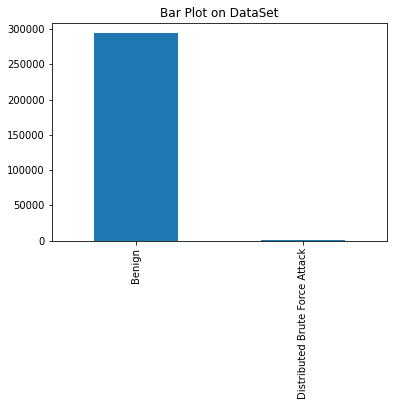

In [ ]:
# statistical counts of genuine and brute force attack flows
counts = df12['Label'].value_counts()
counts.plot(kind = 'bar')
plt.title('Bar Plot on DataSet')
plt.show()

In [ ]:
df12.sample(n=20)

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
35135,2011/08/19 10:38:32.727927,0.009319,udp,147.32.84.132,55417,8.8.8.8,53,CON,0.0,0.0,2,160,72,Benign
26026,2011/08/19 10:36:39.571371,2327.573975,udp,78.141.181.221,34050,147.32.84.229,13363,CON,0.0,0.0,8,1128,848,Benign
200821,2011/08/19 11:15:19.544865,0.000283,udp,147.32.86.187,63243,147.32.80.9,53,CON,0.0,0.0,2,257,76,Benign
117440,2011/08/19 10:56:11.042750,0.346163,udp,147.32.86.165,12114,111.250.219.146,25497,CON,0.0,0.0,2,135,75,Benign
58020,2011/08/19 10:42:59.412713,838.280762,udp,87.48.54.138,19571,147.32.84.229,13363,CON,0.0,0.0,6,689,503,Benign
81151,2011/08/19 10:47:44.699211,0.000189,udp,147.32.84.138,33184,147.32.80.9,53,CON,0.0,0.0,2,214,81,Benign
289057,2011/08/19 11:36:55.188081,0.001001,udp,83.109.155.69,63981,147.32.84.229,13363,CON,0.0,0.0,2,587,77,Benign
294639,2011/08/19 11:38:12.020116,0.000687,udp,159.148.181.131,52390,147.32.84.229,13363,CON,0.0,0.0,2,130,70,Benign
154985,2011/08/19 11:04:27.562569,0.000270,udp,147.32.85.34,53922,147.32.80.9,53,CON,0.0,0.0,2,323,85,Benign
116964,2011/08/19 10:56:05.636914,25.365929,tcp,147.32.84.59,59830,91.198.174.234,80,FSPA_FSPA,0.0,0.0,36,14101,3782,Benign


Feature Scaling

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = df12.select_dtypes(include=['float64','int64']).columns
sc_df = scaler.fit_transform(df12.select_dtypes(include=['float64','int64']))


# turn the result back to a dataframe
sc_df = pd.DataFrame(sc_df, columns = cols)

In [ ]:
categorical_cols = df12.select_dtypes(include='O').keys()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Loop through each categorical column and apply label encoding
for col in categorical_cols:
    le = LabelEncoder()
    df12[col] = le.fit_transform(df12[col].astype(str))

### Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a 70:30 ratio
train_X, test_X, train_Y, test_Y = train_test_split(df12.drop('Label', axis=1), df12['Label'], test_size=0.3, random_state=42)


In [ ]:
train_X.shape

(206689, 13)

In [ ]:
train_X.head()

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes
291676,264883,0.000323,4,10635,31144,5605,15995,6,0.0,0.0,2,232,91
220989,200750,0.362511,4,10617,2680,1151,13708,6,0.0,0.0,2,141,80
240039,218190,0.000355,4,10565,35240,5605,15995,6,0.0,0.0,2,214,81
269844,244987,0.000255,4,10692,41888,5605,15995,6,0.0,0.0,2,234,92
176501,160073,0.000245,4,10662,35621,5605,15995,6,0.0,0.0,2,207,66


In [ ]:
train_Y.head()

291676    0
220989    0
240039    0
269844    0
176501    0
Name: Label, dtype: int64

### Model Training and Prediction

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()   
model.fit(train_X, train_Y)

DecisionTreeClassifier()

In [ ]:
y_preds = model.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

Text(33.0, 0.5, 'Predicted labels')

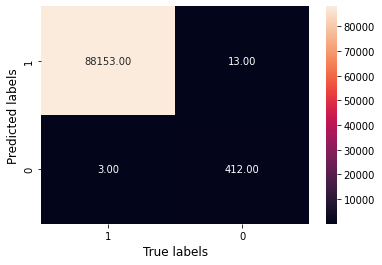

In [ ]:
cm_dt = confusion_matrix(test_Y, y_preds)
sn.heatmap(cm_dt, annot=True,  fmt='.2f', xticklabels = [1, 0] , yticklabels = [1,0],cbar=True)
plt.xlabel('True labels',fontsize=12)
plt.ylabel('Predicted labels',fontsize=12)

In [ ]:

print("Detection Accuracy: ", accuracy_score(test_Y, y_preds)*100,"%")

Detection Accuracy:  99.98193743579323 %


### Export Model

In [ ]:
import pickle

pickle.dump(model, open("NF-12-Distributed-Brute-Force-Attack.pkl", "wb"))